In [3]:
from dotenv import load_dotenv
import os

load_dotenv()
open_ai_key = os.getenv("OPENAI_API_KEY")

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
import requests
from io import BytesIO
from PIL import Image
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import MultiModalMessage
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [ ]:
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=open_ai_key
)

In [ ]:
assistant = AssistantAgent(
    name="vision_agent",
    model_client=model_client,
    system_message="You are a visual reasoning assistant that analyzes images."
)

In [51]:
pil_image = Image.open(BytesIO(requests.get(
    "https://images.squarespace-cdn.com/content/v1/"
    "62015f66f840ef671da14ae7/4161edfa-ebba-4c13-90a4-90383f26260e/"
    "Photographing-NYC-skyline.jpg"
).content))

# 2️⃣ autogen_core.Image ile sarmala
img = AGImage(pil_image)



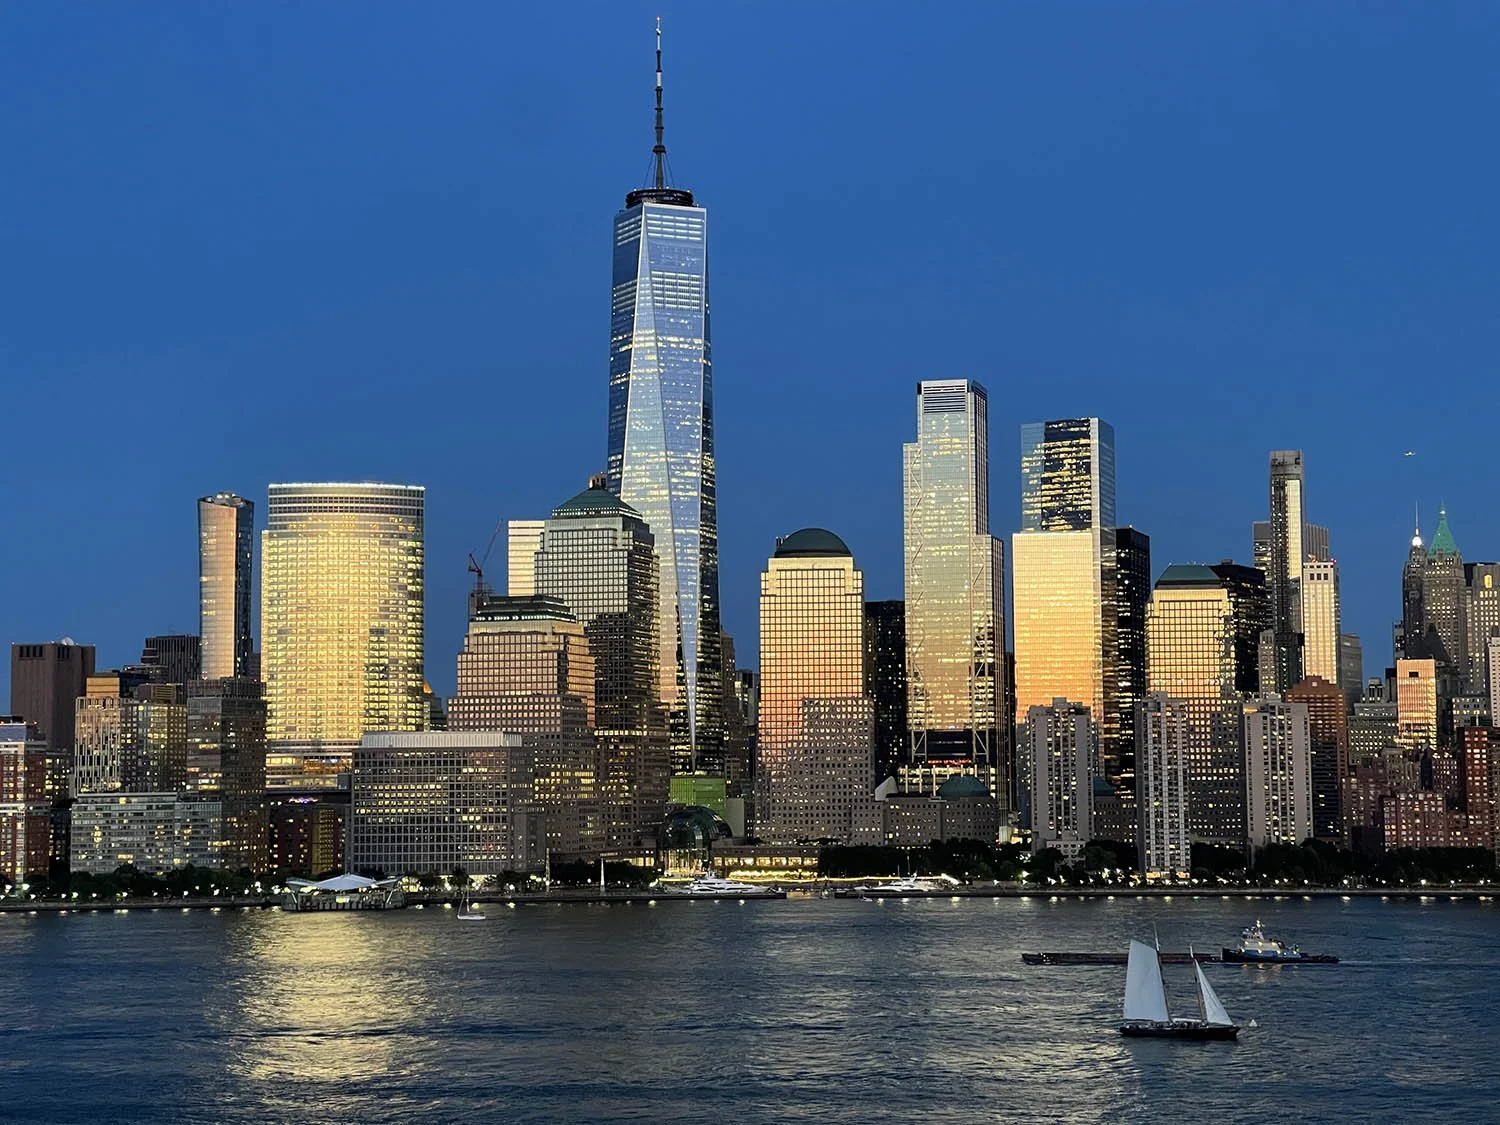

In [52]:
img

In [ ]:
async def test_multimodal_message():
    multimodal_message = MultiModalMessage(
        content=["Describe this image in detail.", img],
        source="User"
    )

    result = await assistant.run(task=multimodal_message)
    print("💬", result.messages[-1].content)

await test_multimodal_message()


💬 The image depicts a city skyline during the early evening. The most prominent feature is a very tall skyscraper with a tapered design and a spire, likely a landmark building. Surrounding it are several other modern skyscrapers with reflective glass facades, catching the golden light of the sunset.

The buildings vary in height and shape, some with dome-like tops and others with flat roofs. Their windows are illuminated, adding a warm glow to the scene. In front of the cityscape is a body of water, reflecting the buildings' lights and the blue of the sky.

On the water, two vessels are visible: a sailboat with white sails and another smaller boat. The sky is a rich blue, indicating a clear, peaceful evening. The overall atmosphere is calm and majestic, highlighting urban life at dusk.
